# EDA

### Import libraries

In [1]:
#Import libraries
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.util import ngrams

import string
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta

import gensim
from gensim.models import Word2Vec

from wordcloud import WordCloud, STOPWORDS

np.random.seed(0)

%matplotlib inline
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/filipszafranski/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/filipszafranski/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Function converting all datastamps to the same format
def timestamp_to_hour(x):
    x = pd.to_datetime(x)
    timestamp = x.strftime('%Y-%m-%d %H:00')
    return timestamp

### Tweet counts by hour

In [3]:
df_counts = pd.read_csv('data/tweet_counts.csv')  
df_counts.head(2)

,start,end,count
0,2022-01-22T00:09:51.000Z,2022-01-22T01:00:00.000Z,16166
1,2022-01-22T01:00:00.000Z,2022-01-22T02:00:00.000Z,18475


In [4]:
df_counts['start'] = df_counts['start'].apply(timestamp_to_hour)
df_counts['end'] = df_counts['end'].apply(timestamp_to_hour)
df_counts.drop(columns='end', inplace=True)
df_counts.set_index('start', inplace=True)
df_counts.head(2)

,count
start,
2022-01-22 00:00,16166
2022-01-22 01:00,18475


In [246]:
#Determine plot style elements
rc = {'figure.figsize':(8,6),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '1',
      'font.family':'Roboto',
      'font.size' : 14,
    'lines.linewidth':3,
     'axes.labelpad': 20,
     'axes.labelweight': 'medium',
     'axes.ymargin': 0.1}

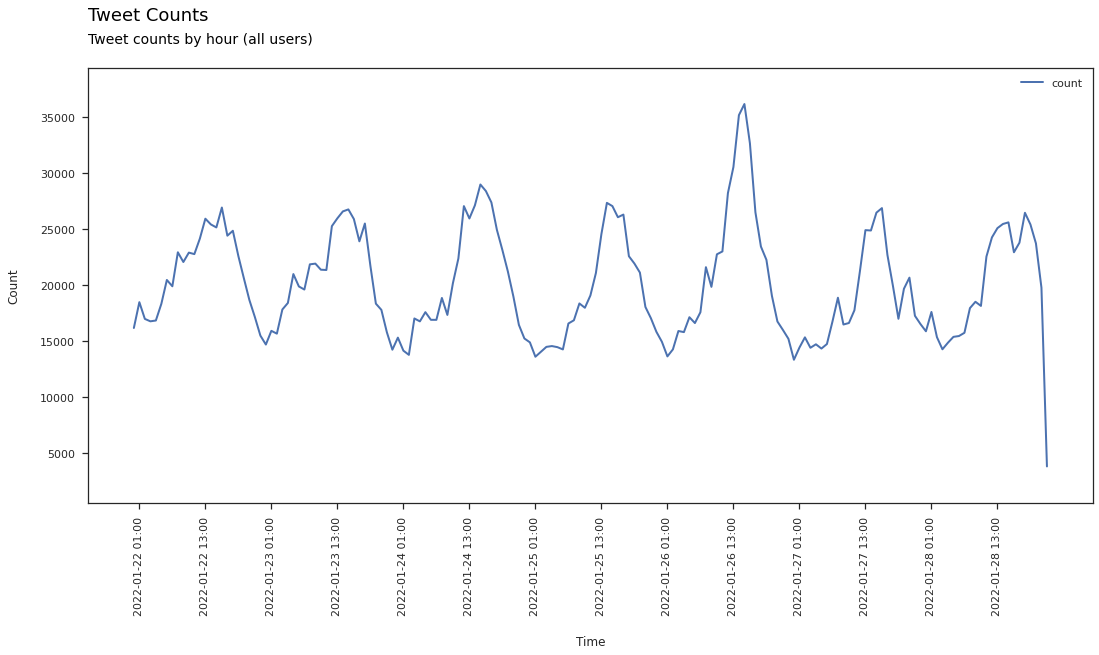

In [303]:
#Tweet Counts Plot
sns.set_style("ticks")
sns.set_context("notebook")
plt.figure(figsize=(18, 8))
plt.rcParams.update(rc)
ax = sns.lineplot(data=df_counts)
ax.set_xticks(ax.get_xticks()[1::12])
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Time', ylabel='Count')

ax.text(x=0, y=1.1, s='Tweet Counts', weight='medium', fontsize=18, color='black', ha='left', va='bottom', transform=ax.transAxes)
ax.text(x=0, y=1.05, s='''Tweet counts by hour (all users)''', weight='light', fontsize=14, color='black', ha='left', va='bottom', transform=ax.transAxes);
plt.savefig('img/plot_tweet_counts.png', bbox_inches='tight')

### BTC price by hour

In [6]:
df_btc_usd = pd.read_csv('data/btc_usd_hourly.csv', )  
df_btc_usd.head(2)

,time,high,low,open,volumefrom,volumeto,close
0,2022-01-21 07:00:00,39173.58,38575.80,38697.49,1758.17,68334552.69,39142.31
1,2022-01-21 08:00:00,39294.17,39030.88,39142.31,1288.39,50434328.22,39170.84


In [7]:
df_btc_usd['time'] = df_btc_usd['time'].apply(timestamp_to_hour)
df_btc_usd.head(2)

,time,high,low,open,volumefrom,volumeto,close
0,2022-01-21 07:00,39173.58,38575.80,38697.49,1758.17,68334552.69,39142.31
1,2022-01-21 08:00,39294.17,39030.88,39142.31,1288.39,50434328.22,39170.84


In [124]:
df_btc_usd_diff = df_btc_usd.copy()
df_btc_usd_diff['diff'] = df_btc_usd_diff['close'].diff()
df_btc_usd_diff['diff_high_low'] = df_btc_usd_diff['high'] - df_btc_usd_diff['low']
df_btc_usd_diff['diff_open_close'] = df_btc_usd_diff['open'] - df_btc_usd_diff['close']
df_btc_usd_diff.set_index('time', inplace=True)

In [125]:
df_btc_usd_diff.head()

,high,low,open,volumefrom,volumeto,close,diff,diff_high_low,diff_open_close
time,,,,,,,,,
2022-01-21 07:00,39173.58,38575.80,38697.49,1758.17,68334552.69,39142.31,NaN,597.78,-444.82
2022-01-21 08:00,39294.17,39030.88,39142.31,1288.39,50434328.22,39170.84,28.53,263.29,-28.53
2022-01-21 09:00,39191.28,38953.29,39170.84,1549.57,60508276.18,38980.45,-190.39,237.99,190.39
2022-01-21 10:00,39090.91,38878.86,38980.45,1272.89,49626815.02,38981.85,1.40,212.05,-1.40
2022-01-21 11:00,38986.50,38694.25,38981.85,1454.38,56453857.47,38901.98,-79.87,292.25,79.87


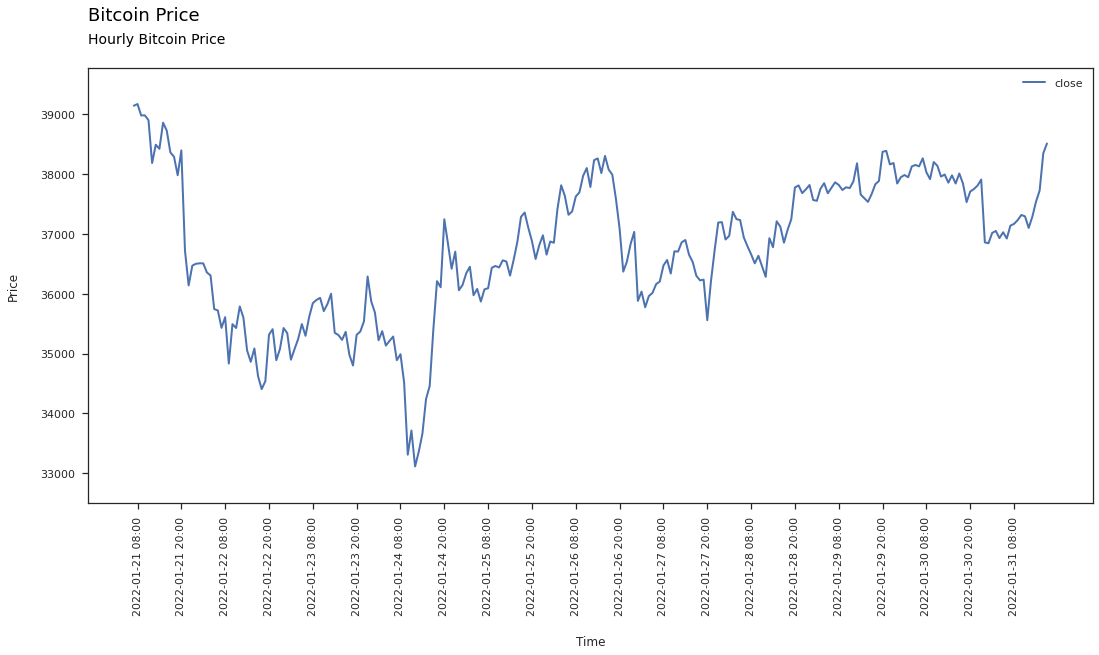

In [293]:
sns.set_style("ticks")
sns.set_context("notebook")

plt.figure(figsize=(18, 8))
plt.rcParams.update(rc)

ax = sns.lineplot(data=df_btc_usd_diff[['close']])
ax.set(xlabel='Time', ylabel='Price')
ax.set_xticks(ax.get_xticks()[1::12])
ax.tick_params(axis='x', rotation=90)
ax.text(x=0, y=1.1, s='Bitcoin Price', weight='medium', fontsize=18, color='black', ha='left', va='bottom', transform=ax.transAxes)
ax.text(x=0, y=1.05, s='''Hourly Bitcoin Price''', weight='light', fontsize=14, color='black', ha='left', va='bottom', transform=ax.transAxes);

plt.savefig('img/plot_btc_price.png', bbox_inches='tight');

### Tweet data

In [13]:
#Upload tweet data from csv
df_tweet_data = pd.read_csv('data/tweet_data.csv')  
df_tweet_data.head(2)

,tweet_id,author_id,created_at,source,retweet_count,reply_count,like_count,text
0,1487185499915706371,613649581,2022-01-28 22:07:08+00:00,Twitter Web App,0,2,2,@FamiLee_Farm @0xBingBong I first dissented in...
1,1487185295757905920,19721574,2022-01-28 22:06:19+00:00,Twitter for iPhone,22,7,105,A disaster.\n\nThe sooner aid agencies worldwi...


In [14]:
#Update timestamp created_at
df_tweet_data.created_at = df_tweet_data['created_at'].apply(timestamp_to_hour)
df_tweet_data.head(2)

,tweet_id,author_id,created_at,source,retweet_count,reply_count,like_count,text
0,1487185499915706371,613649581,2022-01-28 22:00,Twitter Web App,0,2,2,@FamiLee_Farm @0xBingBong I first dissented in...
1,1487185295757905920,19721574,2022-01-28 22:00,Twitter for iPhone,22,7,105,A disaster.\n\nThe sooner aid agencies worldwi...


In [15]:
#Group tweet metric by hour
df_tweet_data_group = df_tweet_data.drop(columns=['text','tweet_id', 'author_id']).groupby(['created_at']).sum()
df_tweet_data_group.reset_index(inplace=True)
df_tweet_data_group = df_tweet_data_group.rename(columns={'created_at': 'time'})
df_tweet_data_group.set_index('time', inplace=True)
df_tweet_data_group

,retweet_count,reply_count,like_count
time,,,
2022-01-22 00:00,697,1171,6578
2022-01-22 01:00,933,833,5380
2022-01-22 02:00,180,192,886
2022-01-22 03:00,103,100,1033
2022-01-22 04:00,604,2531,7321
...,...,...,...
2022-01-28 18:00,4144,943,22828
2022-01-28 19:00,738,709,9009
2022-01-28 20:00,906,573,7527


In [275]:
#Determine plot style elements
rc = {'figure.figsize':(8,6),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '1',
      'font.family':'Roboto',
      'font.size' : 14,
    'lines.linewidth':2,
     'axes.labelpad': 20,
     'axes.labelweight': 'medium',
     'axes.ymargin': 0.1}

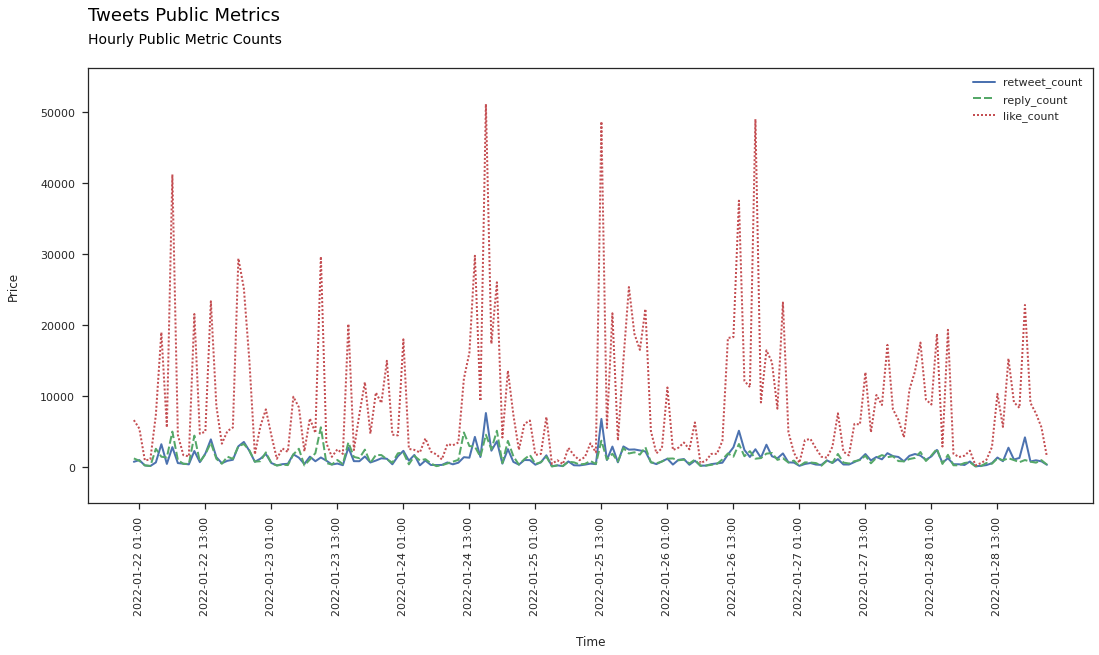

In [277]:
sns.set_style("ticks")
sns.set_context("notebook")
plt.rcParams.update(rc)
plt.figure(figsize=(18, 8))
ax = sns.lineplot(data=df_tweet_data_group)
ax.set(xlabel='Time', ylabel='Price')
ax.set_xticks(ax.get_xticks()[1::12])
ax.tick_params(axis='x', rotation=90)
ax.text(x=0, y=1.1, s='Tweets Public Metrics', weight='medium', fontsize=18, color='black', ha='left', va='bottom', transform=ax.transAxes)
ax.text(x=0, y=1.05, s='''Hourly Public Metric Counts''', weight='light', fontsize=14, color='black', ha='left', va='bottom', transform=ax.transAxes);

plt.savefig('img/tweet_public_metrics.png', bbox_inches='tight');
# sns.plotting_context()

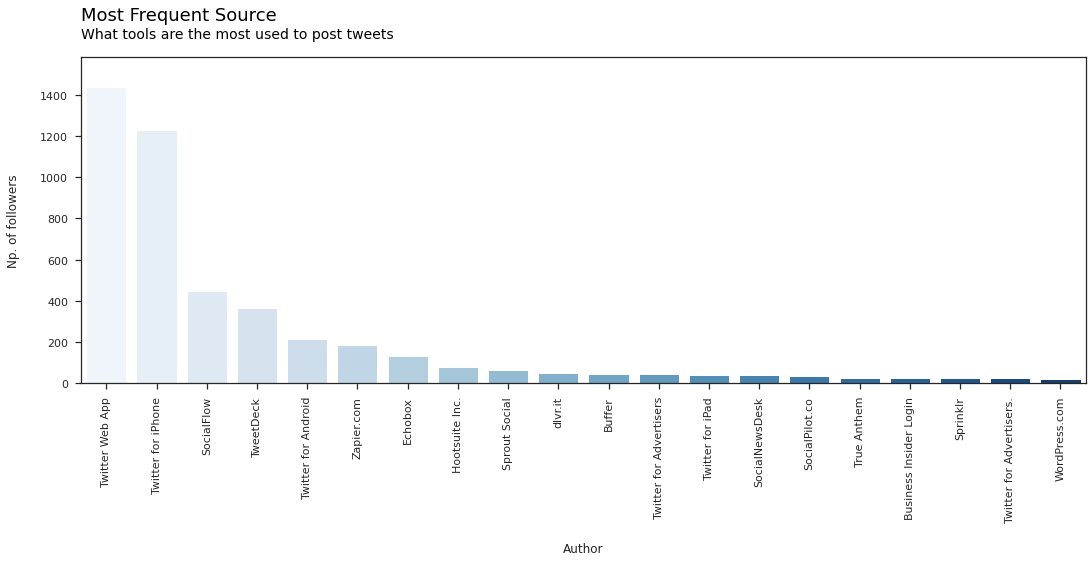

In [295]:
#Determine plot style elements
rc = {'figure.figsize':(18,6),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '1',
      'font.family':'Roboto',
      'font.size' : 14,
    'lines.linewidth':2,
     'axes.labelpad': 20,
     'axes.labelweight': 'medium',
     'axes.ymargin': 0.1}

#Plot most popular twitter posting tools
plt.rcParams.update(rc)

ax = sns.countplot(x="source", data=df_tweet_data, order=df_tweet_data.source.value_counts().iloc[:20].index, palette="Blues")
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Author', ylabel='Np. of followers')

ax.text(x=0, y=1.1, s='Most Frequent Source', weight='medium', fontsize=18, color='black', ha='left', va='bottom', transform=ax.transAxes)
ax.text(x=0, y=1.05, s='''What tools are the most used to post tweets''', weight='light', fontsize=14, color='black', ha='left', va='bottom', transform=ax.transAxes);

plt.savefig('img/tweet_source.png', bbox_inches='tight');

### Author data

In [287]:
#Upload tweet data from csv
df_tweet_author = pd.read_csv('data/tweet_author.csv')  
df_tweet_author

,name,author_id,username,followers_count,following_count,tweet_count,listed_count
0,Hester Peirce,613649581,HesterPeirce,79198,917,1562,851
1,Alex Gladstein 🌋 ⚡,19721574,gladstein,159098,2704,76435,2001
2,Rodney Glassman,21230289,rodneyglassman,1983,1424,546,107
3,Elizabeth Warren,970207298,SenWarren,7030559,515,9191,19890
4,Bitcoin News,3367334171,BTCTN,2312348,921,24849,10327
...,...,...,...,...,...,...,...
3731,Lark Davis,30325257,TheCryptoLark,863452,448,39045,5309
3732,Bloomberg,34713362,business,7858682,1372,759908,64632
3733,Michael Rapoport,626788014,rapoportmike,3237,633,7466,103
3734,CoinMetro,918922778073620481,CoinMetro,17579,1357,3245,131


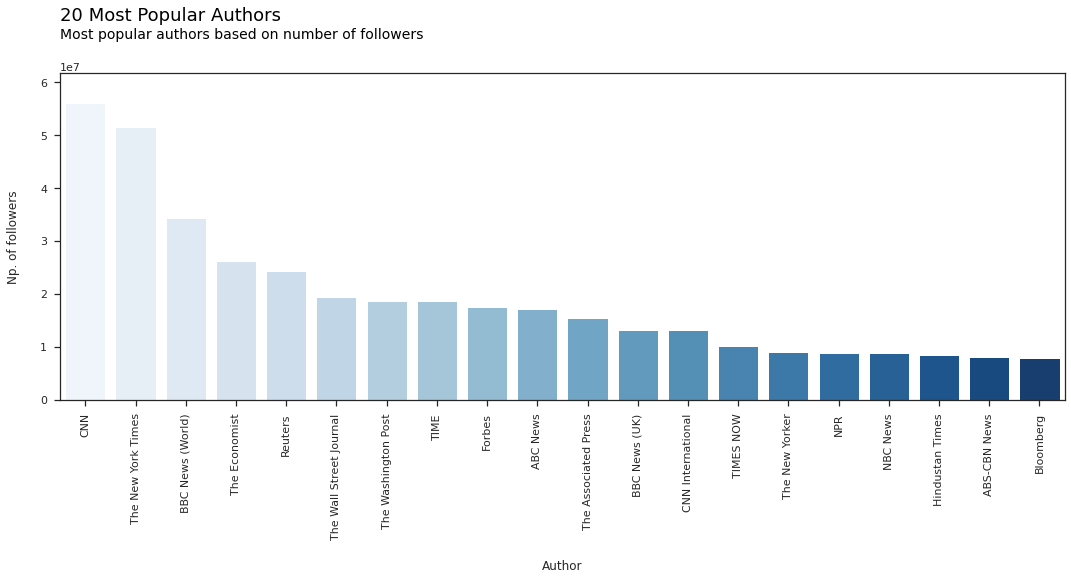

In [298]:
#Determine plot style elements
rc = {'figure.figsize':(18,6),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '1',
      'font.family':'Roboto',
      'font.size' : 14,
    'lines.linewidth':2,
     'axes.labelpad': 20,
     'axes.labelweight': 'medium',
     'axes.ymargin': 0.1}

#Plot most popular twitter posting tools
plt.rcParams.update(rc)
#Plot most popular twitter posting tools

df_tweet_author = df_tweet_author.sort_values(by='followers_count', ascending=False).drop_duplicates(subset=['name']).head(20)
ax = sns.barplot(x="name", y="followers_count", data=df_tweet_author, palette="Blues")
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Author', ylabel='Np. of followers')

ax.text(x=0, y=1.15, s='20 Most Popular Authors', weight='medium', fontsize=18, color='black', ha='left', va='bottom', transform=ax.transAxes)
ax.text(x=0, y=1.1, s='''Most popular authors based on number of followers''', weight='light', fontsize=14, color='black', ha='left', va='bottom', transform=ax.transAxes);

plt.savefig('img/author_most_pop.png', bbox_inches='tight');

### Sentiment analysis

In [181]:
df_tweet_sentiment = pd.read_csv('data/tweet_labeled.csv')  
df_tweet_sentiment.head()

,created_at,text,label
0,2022-01-28 22:07:08+00:00,@FamiLee_Farm @0xBingBong I first dissented in...,negative
1,2022-01-28 22:06:19+00:00,A disaster.\n\nThe sooner aid agencies worldwi...,negative
2,2022-01-28 22:03:07+00:00,With the very real threat of the government tr...,negative
3,2022-01-28 22:03:03+00:00,Bitcoin mining's energy use has more than trip...,neutral
4,2022-01-28 22:02:27+00:00,Tori Zero NFT Project Launched a Joint Coopera...,positive


In [17]:
df_tweet_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4766 entries, 0 to 4765
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  4766 non-null   object
 1   text        4766 non-null   object
 2   label       4766 non-null   object
dtypes: object(3)
memory usage: 111.8+ KB


In [18]:
df_tweet_sentiment.created_at = df_tweet_sentiment.created_at.apply(lambda x: timestamp_to_hour(x))

In [19]:
df_tweet_sentiment.head()

,created_at,text,label
0,2022-01-28 22:00,@FamiLee_Farm @0xBingBong I first dissented in...,negative
1,2022-01-28 22:00,A disaster.\n\nThe sooner aid agencies worldwi...,negative
2,2022-01-28 22:00,With the very real threat of the government tr...,negative
3,2022-01-28 22:00,Bitcoin mining's energy use has more than trip...,neutral
4,2022-01-28 22:00,Tori Zero NFT Project Launched a Joint Coopera...,positive


In [20]:
df_tweet_sentiment_counts = df_tweet_sentiment.drop(columns='text').groupby(['created_at', 'label']).size().unstack()
df_tweet_sentiment_counts.reset_index(inplace=True)
df_tweet_sentiment_counts = df_tweet_sentiment_counts.rename(columns={'created_at': 'time'})
df_tweet_sentiment_counts.set_index('time', inplace=True)
df_tweet_sentiment_counts.head()

label,negative,neutral,positive
time,,,
2022-01-22 00:00,7.0,14.0,6.0
2022-01-22 01:00,2.0,10.0,11.0
2022-01-22 02:00,1.0,4.0,10.0
2022-01-22 03:00,4.0,7.0,3.0
2022-01-22 04:00,5.0,8.0,6.0


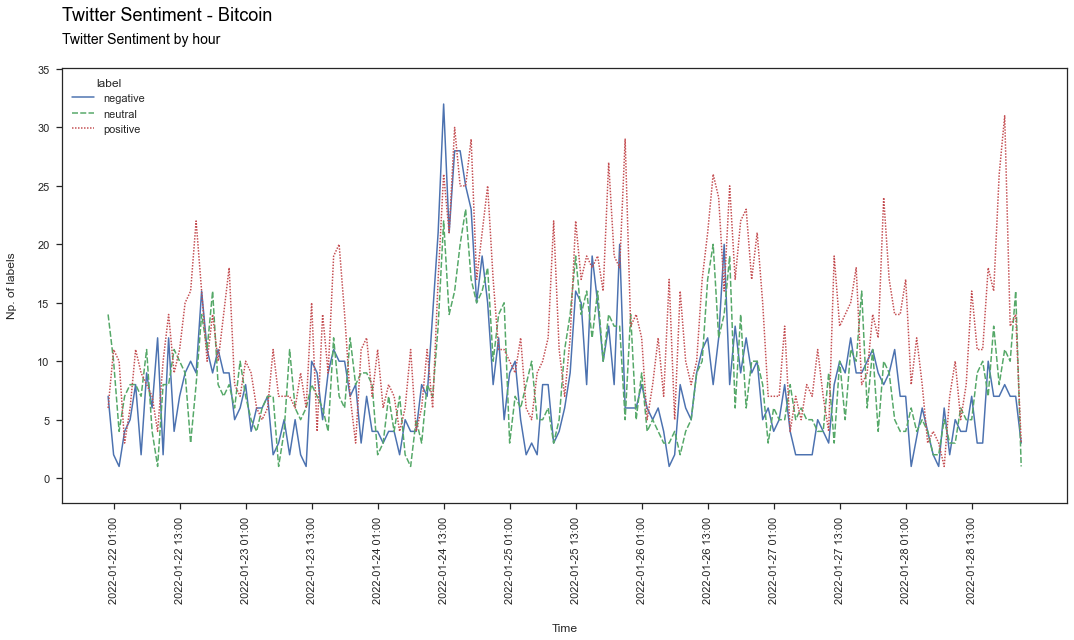

In [302]:
sns.set_style("ticks")
sns.set_context("notebook")
plt.figure(figsize=(18, 8))
ax = sns.lineplot(data=df_tweet_sentiment_counts)
ax.set_xticks(ax.get_xticks()[1::12])
ax.tick_params(axis='x', rotation=90)
ax.set(xlabel='Time', ylabel='Np. of labels')

ax.text(x=0, y=1.10, s='Twitter Sentiment - Bitcoin', weight='medium', fontsize=18, color='black', ha='left', va='bottom', transform=ax.transAxes)
ax.text(x=0, y=1.05, s='''Twitter Sentiment by hour''', weight='light', fontsize=14, color='black', ha='left', va='bottom', transform=ax.transAxes);

plt.savefig('img/labels_count.png', bbox_inches='tight');

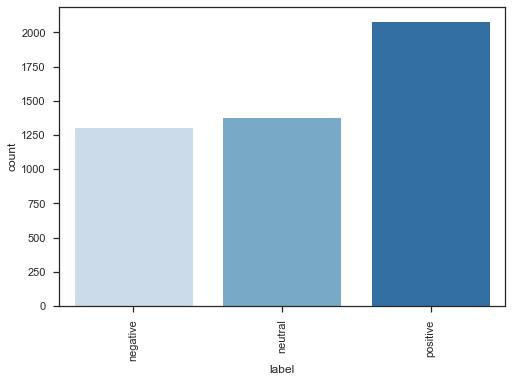

In [210]:
#Plot labels count
ax = sns.countplot(x="label", data=df_tweet_sentiment, palette="Blues")
ax.tick_params(axis='x', rotation=90)

### Concatenate dataframes

Having the date as the index has several advantages, among others, easy visualization with dates on the x-axis, and the functionality to resample the data.


In [115]:
df_tweet_sentiment_counts

label,negative,neutral,positive
time,,,
2022-01-22 00:00,7.0,14.0,6.0
2022-01-22 01:00,2.0,10.0,11.0
2022-01-22 02:00,1.0,4.0,10.0
2022-01-22 03:00,4.0,7.0,3.0
2022-01-22 04:00,5.0,8.0,6.0
...,...,...,...
2022-01-28 18:00,7.0,8.0,26.0
2022-01-28 19:00,8.0,11.0,31.0
2022-01-28 20:00,7.0,10.0,13.0


In [23]:
df_tweet_data_group

,retweet_count,reply_count,like_count
time,,,
2022-01-22 00:00,697,1171,6578
2022-01-22 01:00,933,833,5380
2022-01-22 02:00,180,192,886
2022-01-22 03:00,103,100,1033
2022-01-22 04:00,604,2531,7321
...,...,...,...
2022-01-28 18:00,4144,943,22828
2022-01-28 19:00,738,709,9009
2022-01-28 20:00,906,573,7527


In [126]:
df_btc_usd_diff

,high,low,open,volumefrom,volumeto,close,diff,diff_high_low,diff_open_close
time,,,,,,,,,
2022-01-21 07:00,39173.58,38575.80,38697.49,1758.17,6.833455e+07,39142.31,NaN,597.78,-444.82
2022-01-21 08:00,39294.17,39030.88,39142.31,1288.39,5.043433e+07,39170.84,28.53,263.29,-28.53
2022-01-21 09:00,39191.28,38953.29,39170.84,1549.57,6.050828e+07,38980.45,-190.39,237.99,190.39
2022-01-21 10:00,39090.91,38878.86,38980.45,1272.89,4.962682e+07,38981.85,1.40,212.05,-1.40
2022-01-21 11:00,38986.50,38694.25,38981.85,1454.38,5.645386e+07,38901.98,-79.87,292.25,79.87
...,...,...,...,...,...,...,...,...,...
2022-01-31 13:00,37378.11,36844.68,37100.04,1891.52,7.033098e+07,37286.89,186.85,533.43,-186.85
2022-01-31 14:00,37537.51,37218.04,37286.89,1723.68,6.444947e+07,37537.04,250.15,319.47,-250.15
2022-01-31 15:00,37911.21,37528.54,37537.04,2782.20,1.050991e+08,37724.71,187.67,382.67,-187.67


In [25]:
df_counts

,count
start,
2022-01-22 00:00,16166
2022-01-22 01:00,18475
2022-01-22 02:00,16978
2022-01-22 03:00,16762
2022-01-22 04:00,16834
...,...
2022-01-28 18:00,26471
2022-01-28 19:00,25426
2022-01-28 20:00,23729


In [127]:
final_df = df_btc_usd_diff.join([df_tweet_data_group,df_counts, df_tweet_sentiment_counts])
final_df.dropna(subset=['positive'], inplace=True)
final_df

,high,low,open,volumefrom,volumeto,close,diff,diff_high_low,diff_open_close,retweet_count,reply_count,like_count,count,negative,neutral,positive
time,,,,,,,,,,,,,,,,
2022-01-22 00:00,36811.86,36160.28,36469.30,2830.58,1.032656e+08,36500.60,31.30,651.58,-31.30,697.0,1171.0,6578.0,16166.0,7.0,14.0,6.0
2022-01-22 01:00,36624.40,36203.95,36500.60,2214.58,8.061853e+07,36508.18,7.58,420.45,-7.58,933.0,833.0,5380.0,18475.0,2.0,10.0,11.0
2022-01-22 02:00,36569.48,36289.21,36508.18,1460.57,5.319548e+07,36507.27,-0.91,280.27,0.91,180.0,192.0,886.0,16978.0,1.0,4.0,10.0
2022-01-22 03:00,36694.32,36053.64,36507.27,2372.57,8.633400e+07,36355.49,-151.78,640.68,151.78,103.0,100.0,1033.0,16762.0,4.0,7.0,3.0
2022-01-22 04:00,36437.02,36213.05,36355.49,1145.55,4.162005e+07,36305.21,-50.28,223.97,50.28,604.0,2531.0,7321.0,16834.0,5.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28 18:00,37130.73,36797.91,36853.20,1902.39,7.032675e+07,37070.22,217.02,332.82,-217.02,4144.0,943.0,22828.0,26471.0,7.0,8.0,26.0
2022-01-28 19:00,37254.00,36786.03,37070.22,1847.49,6.837532e+07,37245.37,175.15,467.97,-175.15,738.0,709.0,9009.0,25426.0,8.0,11.0,31.0
2022-01-28 20:00,37869.29,37159.63,37245.37,2488.91,9.337495e+07,37776.13,530.76,709.66,-530.76,906.0,573.0,7527.0,23729.0,7.0,10.0,13.0


In [128]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, 2022-01-22 00:00 to 2022-01-28 22:00
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   high             167 non-null    float64
 1   low              167 non-null    float64
 2   open             167 non-null    float64
 3   volumefrom       167 non-null    float64
 4   volumeto         167 non-null    float64
 5   close            167 non-null    float64
 6   diff             167 non-null    float64
 7   diff_high_low    167 non-null    float64
 8   diff_open_close  167 non-null    float64
 9   retweet_count    167 non-null    float64
 10  reply_count      167 non-null    float64
 11  like_count       167 non-null    float64
 12  count            167 non-null    float64
 13  negative         164 non-null    float64
 14  neutral          167 non-null    float64
 15  positive         167 non-null    float64
dtypes: float64(16)
memory usage: 22.2+ KB


<Figure size 1296x1296 with 0 Axes>

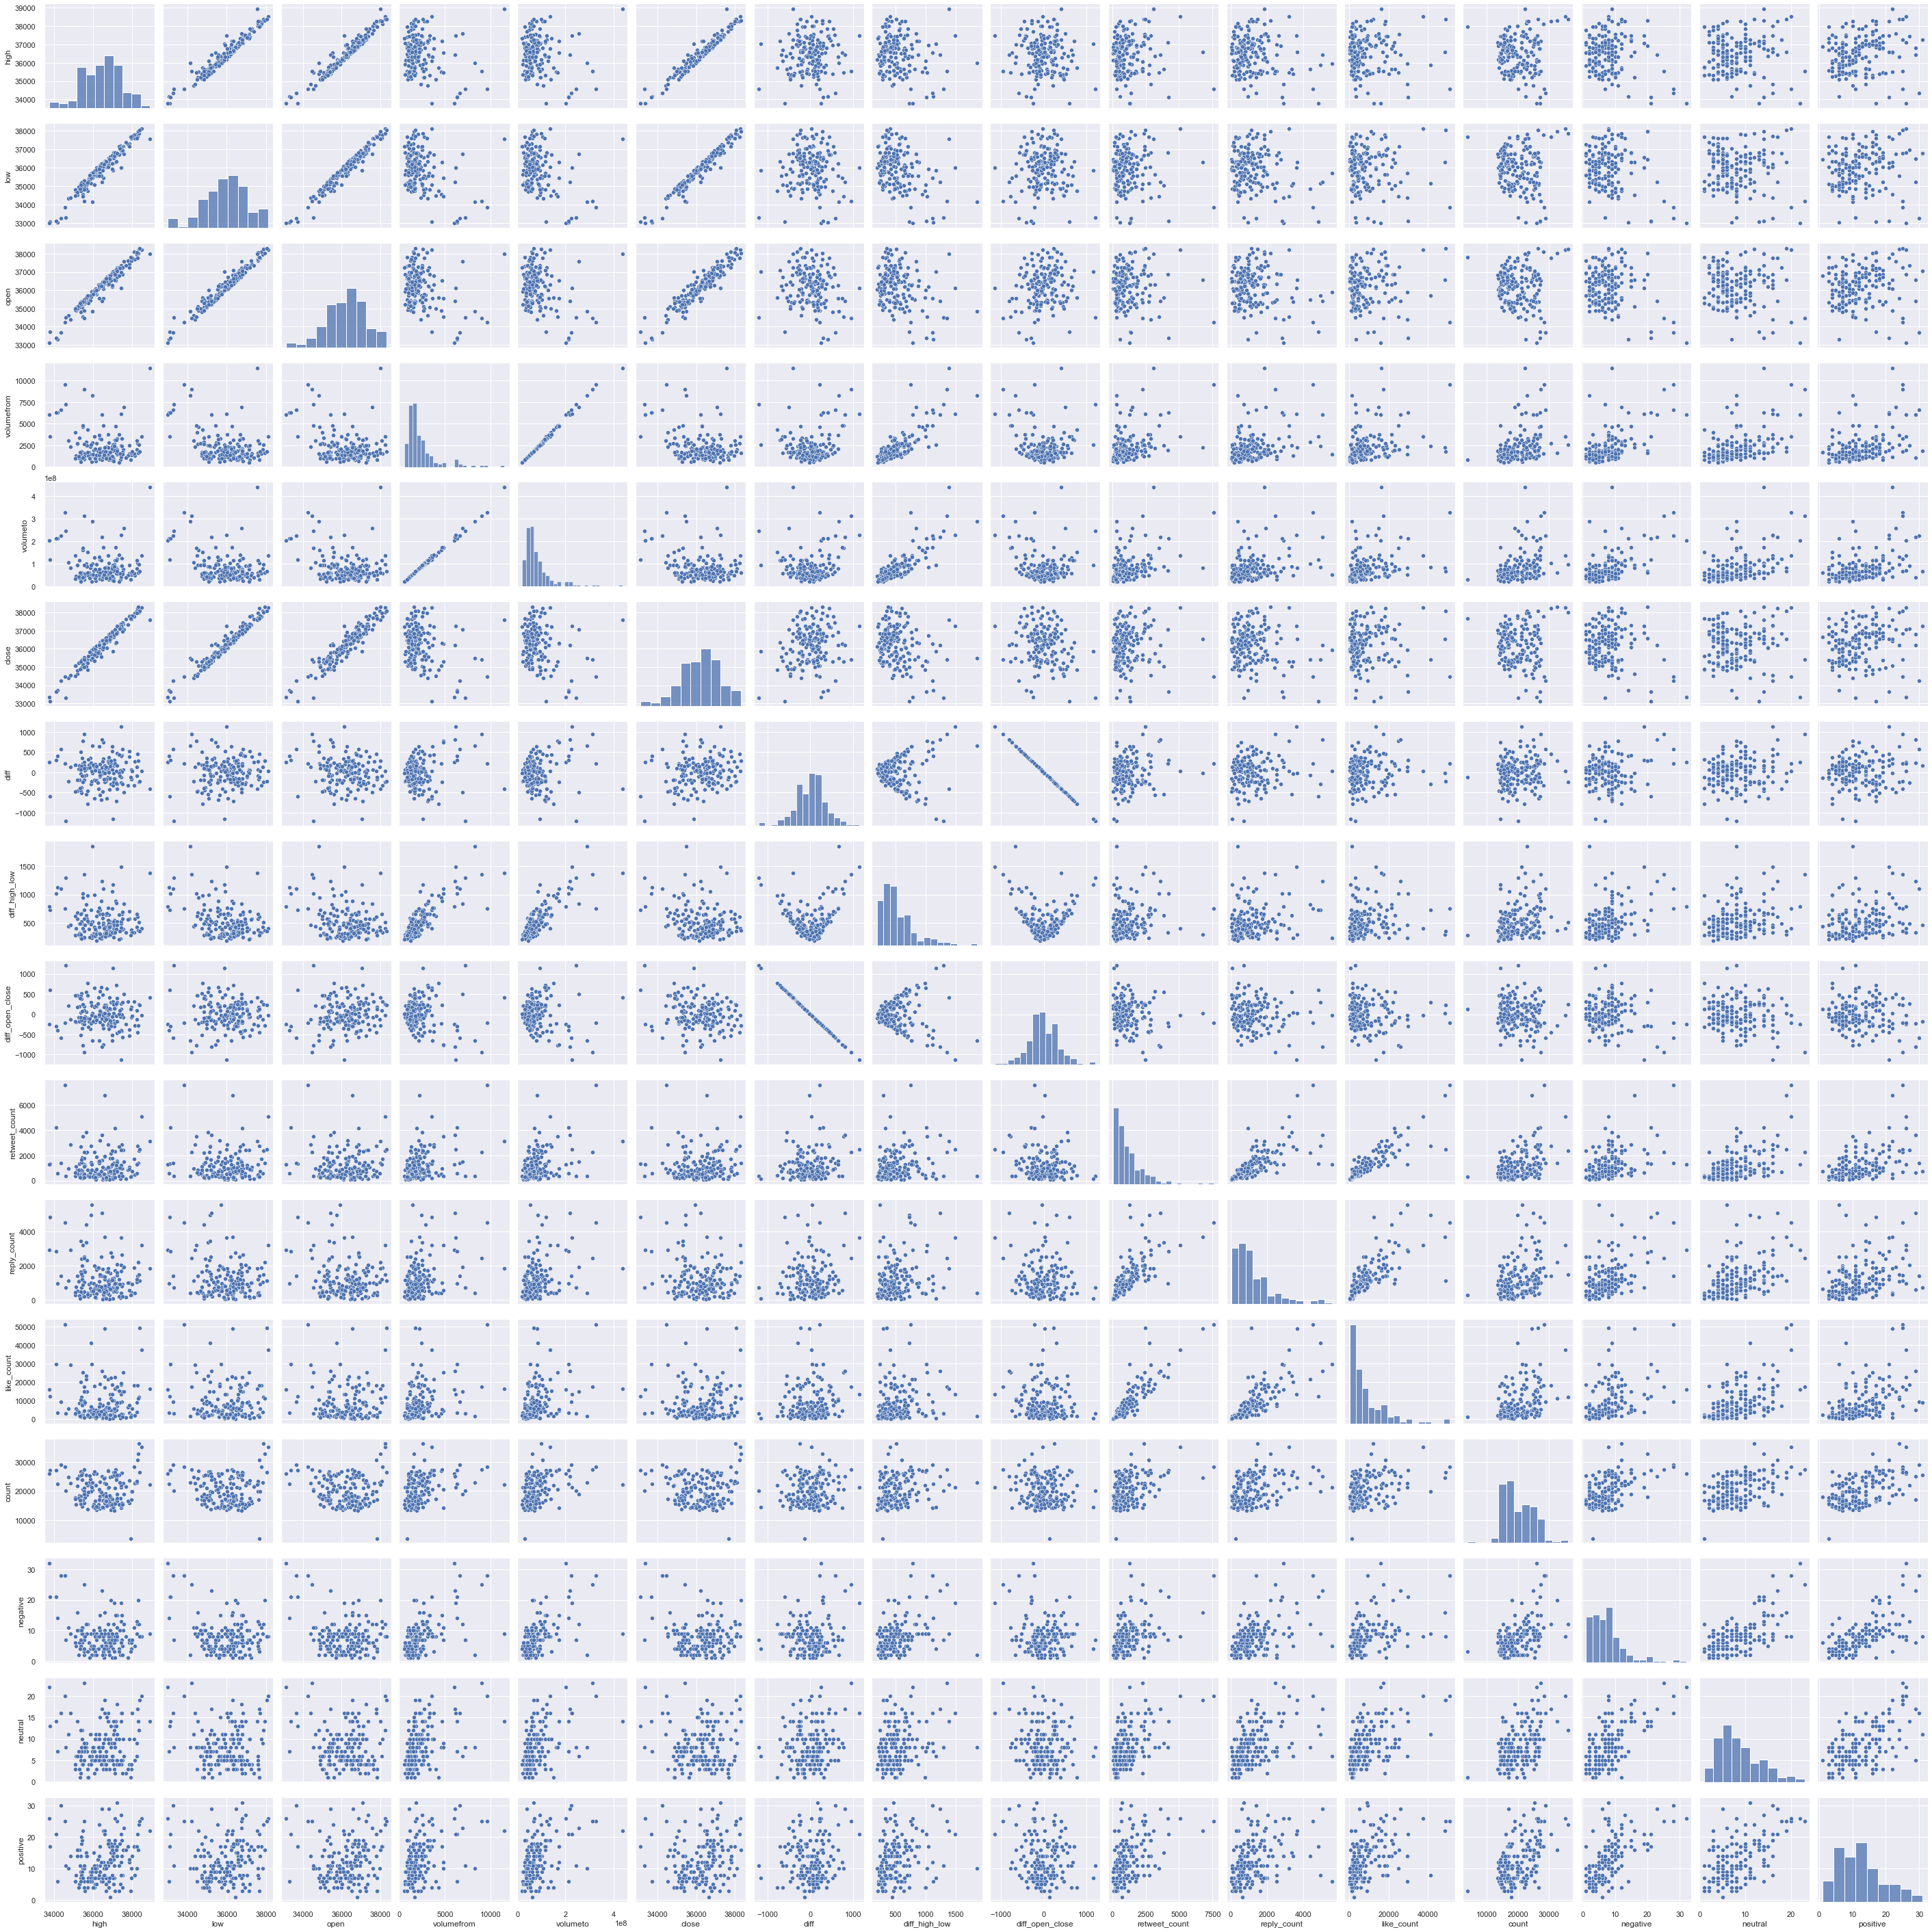

In [217]:
sns.set_style("darkgrid")
plt.figure(figsize=(18, 18))
sns.pairplot(final_df)
plt.savefig('img/scatter_plot_final_df.png')

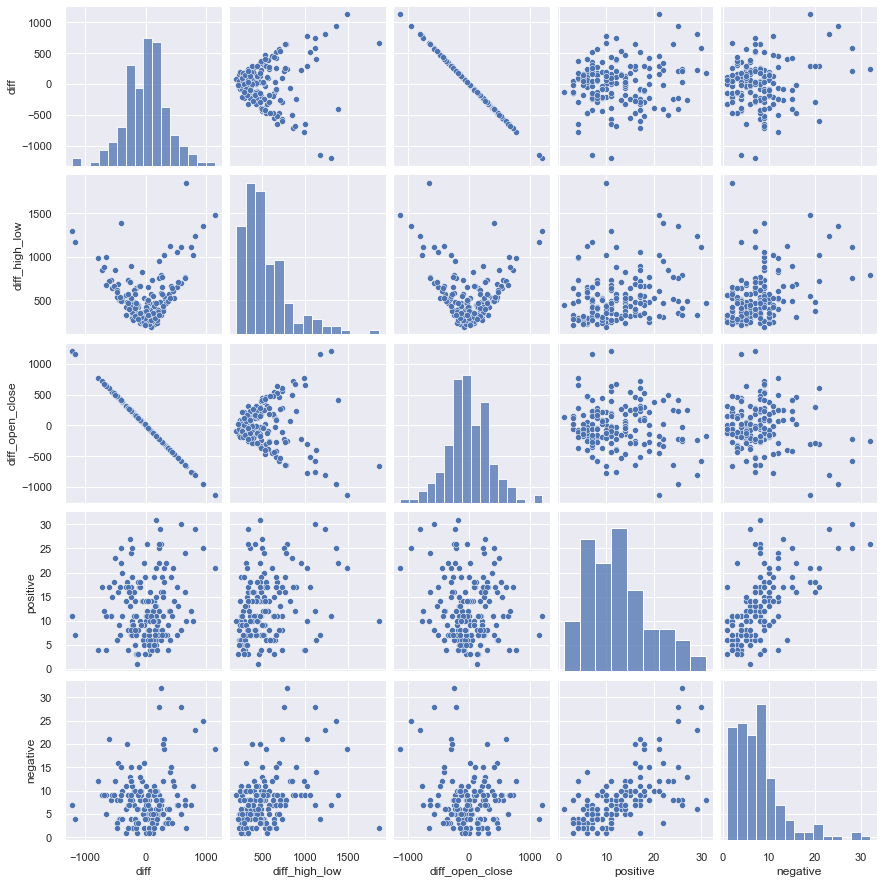

In [218]:
columns=['diff', 'diff_high_low', 'diff_open_close', 'positive', 'negative']
sns.pairplot(final_df[columns]);
plt.savefig('img/scatter_plot_final_df_selected.png')

### Whole data coorelations 

In [116]:
df_corr = final_df.corr()
df_corr

,high,low,open,volumefrom,volumeto,close,diff,diff_high_low,retweet_count,reply_count,like_count,count,negative,neutral,positive
high,1.000000,0.965874,0.968810,-0.162641,-0.110562,0.973015,0.028958,-0.124251,0.002828,-0.173243,0.022088,0.001181,-0.180413,0.014152,0.154742
low,0.965874,1.000000,0.978204,-0.365440,-0.315754,0.973152,0.002310,-0.377017,-0.047678,-0.217084,-0.014451,-0.063315,-0.273397,-0.065596,0.072754
open,0.968810,0.978204,1.000000,-0.301921,-0.251991,0.940070,-0.156278,-0.283017,-0.042230,-0.206171,-0.005758,-0.052051,-0.257605,-0.057022,0.088623
volumefrom,-0.162641,-0.365440,-0.301921,1.000000,0.997799,-0.260123,0.115846,0.818372,0.405499,0.336266,0.329592,0.390600,0.569856,0.469601,0.425157
volumeto,-0.110562,-0.315754,-0.251991,0.997799,1.000000,-0.211273,0.113584,0.814261,0.409306,0.331291,0.331548,0.390603,0.555129,0.471423,0.433838
close,0.973015,0.973152,0.940070,-0.260123,-0.211273,1.000000,0.189879,-0.248632,0.008181,-0.164860,0.030260,-0.017101,-0.199356,0.004139,0.138992
diff,0.028958,0.002310,-0.156278,0.115846,0.113584,0.189879,1.000000,0.094702,0.145294,0.116092,0.104231,0.100338,0.165811,0.176176,0.147438
diff_high_low,-0.124251,-0.377017,-0.283017,0.818372,0.814261,-0.248632,0.094702,1.000000,0.192762,0.212124,0.134344,0.246775,0.402292,0.301895,0.274631
retweet_count,0.002828,-0.047678,-0.042230,0.405499,0.409306,0.008181,0.145294,0.192762,1.000000,0.722565,0.886465,0.453511,0.462743,0.544350,0.504283
reply_count,-0.173243,-0.217084,-0.206171,0.336266,0.331291,-0.164860,0.116092,0.212124,0.722565,1.000000,0.765503,0.376804,0.504070,0.487429,0.359126


In [29]:
final_df_log = np.log2(final_df)
final_df_log['diff'] = final_df_log['close'].diff()*100
final_df_log['count'] = final_df_log['count']/10
final_df_log.head()

,high,low,open,volumefrom,volumeto,close,diff,diff_high_low,retweet_count,reply_count,like_count,count,negative,neutral,positive
time,,,,,,,,,,,,,,,
2022-01-22 00:00,15.167883,15.142118,15.154395,11.466882,26.621784,15.155633,NaN,9.347799,9.445015,10.193525,12.683433,1.398068,2.807355,3.807355,2.584963
2022-01-22 01:00,15.160518,15.143859,15.155633,11.112817,26.264608,15.155932,0.029957,8.715790,9.865733,9.702173,12.393390,1.417329,1.000000,3.321928,3.459432
2022-01-22 02:00,15.158352,15.147253,15.155932,10.512316,25.664800,15.155896,-0.003596,8.130674,7.491853,7.584963,9.791163,1.405138,0.000000,2.000000,3.321928
2022-01-22 03:00,15.163269,15.137857,15.155896,11.212235,26.363425,15.149886,-0.601055,9.323460,6.686501,6.643856,10.012625,1.403291,2.000000,2.807355,1.584963
2022-01-22 04:00,15.153117,15.144222,15.149886,10.161825,25.310776,15.147889,-0.199664,7.807162,9.238405,11.305492,12.837825,1.403909,2.321928,3.000000,2.584963


### Coorelation matrix

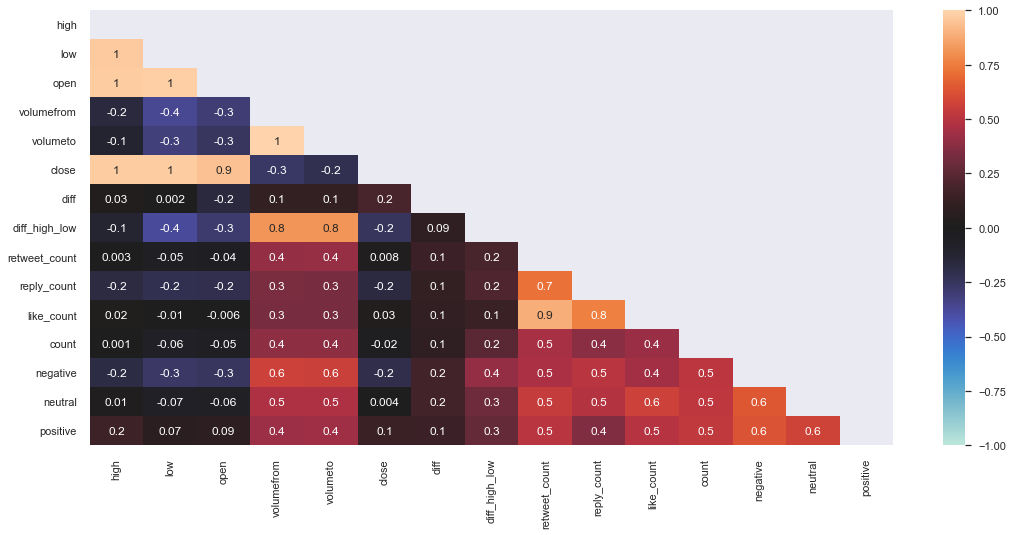

In [219]:
plt.figure(figsize=(18, 8))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
matrix = np.triu(df_corr)
sns.heatmap(df_corr, center=0, annot=True, fmt='.1g', vmin=-1, vmax=1, mask=matrix)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('img/heatmap_corr.png')

This measures the strength and direction of the linear relationship between two variables. It cannot capture nonlinear relationships between two variables and cannot differentiate between dependent and independent variables.1

A value of exactly 1.0 means there is a perfect positive relationship between the two variables. For a positive increase in one variable, there is also a positive increase in the second variable. A value of -1.0 means there is a perfect negative relationship between the two variables. This shows that the variables move in opposite directions—for a positive increase in one variable, there is a decrease in the second variable. If the correlation between two variables is 0, there is no linear relationship between them.

The strength of the relationship varies in degree based on the value of the correlation coefficient. For example, a value of 0.2 shows there is a positive correlation between two variables, but it is weak and likely unimportant. Analysts in some fields of study do not consider correlations important until the value surpasses at least 0.8. However, a correlation coefficient with an absolute value of 0.9 or greater would represent a very strong relationship.

https://www.investopedia.com/terms/c/correlationcoefficient.asp

In [ ]:
final_df_diff = final_df.copy()
final_df_diff.drop(columns='diff')
final_df_diff = final_df.diff()
final_df_diff.dropna(inplace=True)
final_df_diff.head()

,high,low,open,volumefrom,volumeto,close,diff,diff_high_low,retweet_count,reply_count,like_count,count,negative,neutral,positive
time,,,,,,,,,,,,,,,
2022-01-22 01:00,-187.46,43.67,31.30,-616.00,-22647059.71,7.58,-23.72,-231.13,236.0,-338.0,-1198.0,2309.0,-5.0,-4.0,5.0
2022-01-22 02:00,-54.92,85.26,7.58,-754.01,-27423049.55,-0.91,-8.49,-140.18,-753.0,-641.0,-4494.0,-1497.0,-1.0,-6.0,-1.0
2022-01-22 03:00,124.84,-235.57,-0.91,912.00,33138514.41,-151.78,-150.87,360.41,-77.0,-92.0,147.0,-216.0,3.0,3.0,-7.0
2022-01-22 04:00,-257.30,159.41,-151.78,-1227.02,-44713944.10,-50.28,101.50,-416.71,501.0,2431.0,6288.0,72.0,1.0,1.0,3.0
2022-01-22 05:00,-83.53,-591.14,-50.28,998.27,35620490.94,-561.77,-511.49,507.61,2571.0,-1122.0,11654.0,1496.0,3.0,0.0,5.0


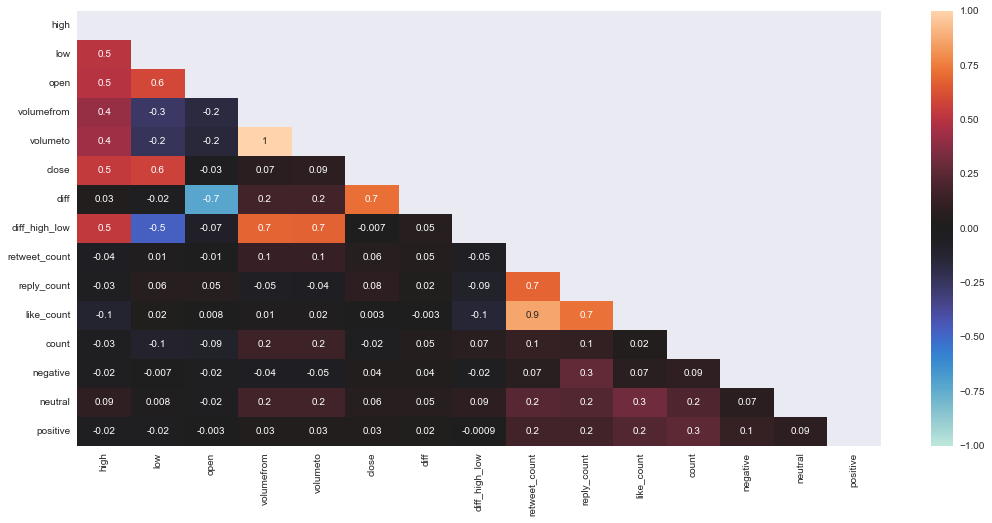

In [95]:
plt.figure(figsize=(18, 8))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
matrix = np.triu(final_df_diff.corr())
sns.heatmap(final_df_diff.corr(), center=0, annot=True, fmt='.1g', vmin=-1, vmax=1, mask=matrix)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Break down of sentiment analysis

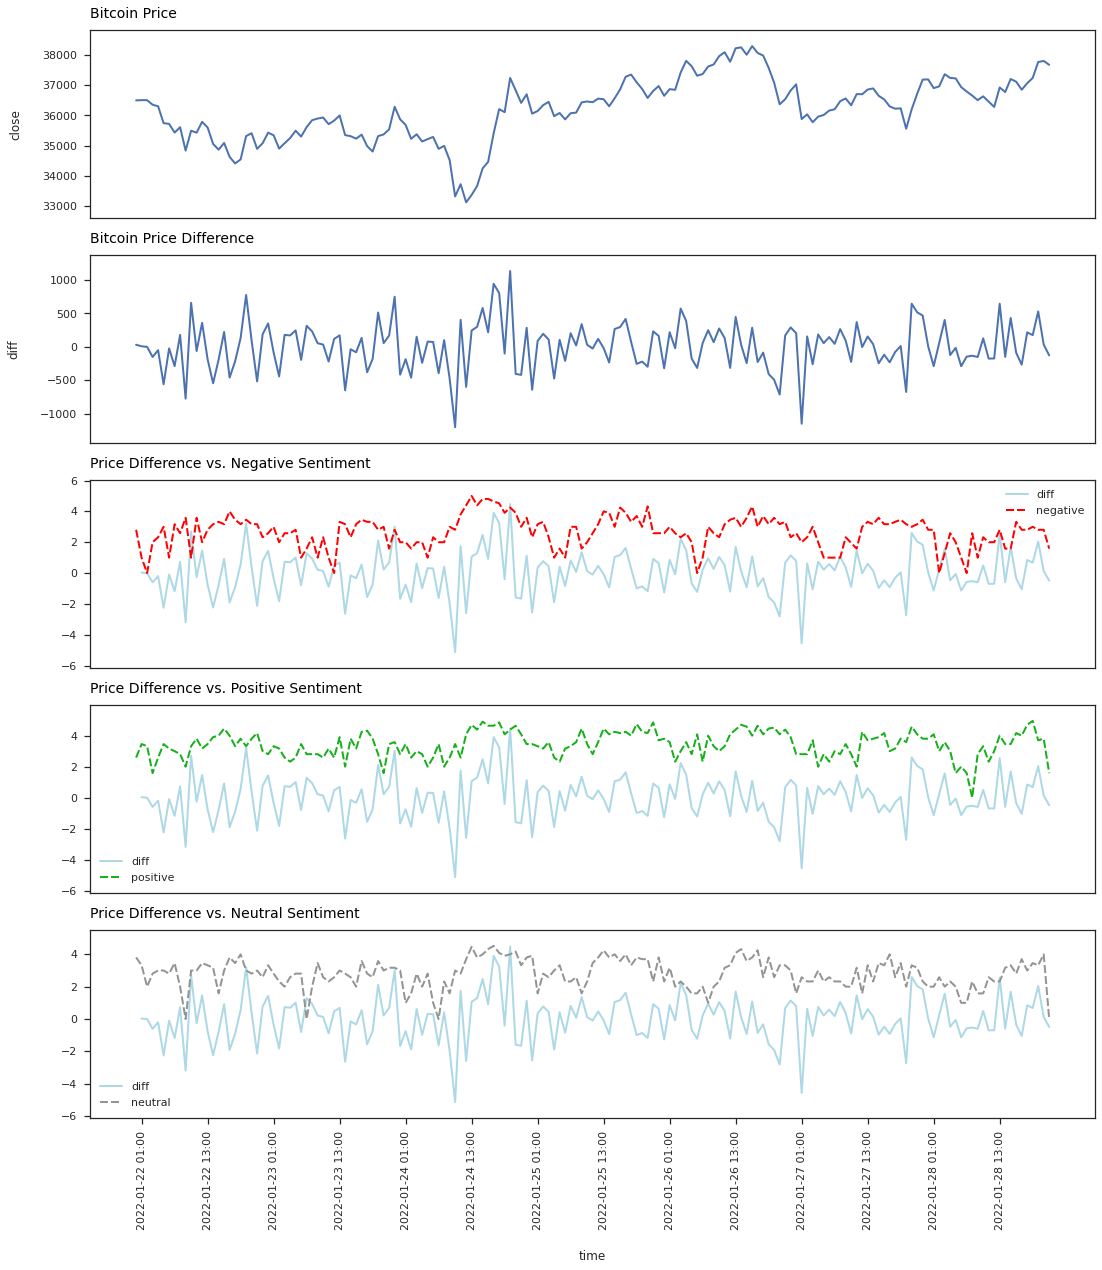

In [407]:
plt.figure(figsize=(18,20))

plt.subplot(5, 1, 1)
plt.rcParams.update(rc)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax = sns.lineplot(data=final_df, x='time', y='close')
ax.set_xticks(ax.get_xticks()[1::12])
ax.tick_params(axis='x', rotation=90)

ax.text(x=0, y=1.05, 
        s='Bitcoin Price', 
        weight='medium', 
        fontsize=14, 
        color='black', 
        ha='left', 
        va='bottom', 
        transform=ax.transAxes
       )

plt.subplot(5, 1, 2)
plt.rcParams.update(rc)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax = sns.lineplot(data=final_df, x='time', y='diff', palette='#0343DF')
ax.set_xticks(ax.get_xticks()[1::12])
ax.tick_params(axis='x', rotation=90)

ax.text(x=0, y=1.05, 
        s='Bitcoin Price Difference', 
        weight='medium', 
        fontsize=14, 
        color='black', 
        ha='left', 
        va='bottom', 
        transform=ax.transAxes
       );

plt.subplot(5, 1, 3)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax = sns.lineplot(data=final_df_log[['diff','negative']], palette=['#ADD8E6', '#FF0000'])
ax.tick_params(axis='x', rotation=90)
ax.set_xticks(ax.get_xticks()[1::12])

ax.text(x=0, y=1.05, 
        s='Price Difference vs. Negative Sentiment', 
        weight='medium', 
        fontsize=14, 
        color='black', 
        ha='left', 
        va='bottom', 
        transform=ax.transAxes
       );

plt.subplot(5, 1, 4)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
ax = sns.lineplot(data=final_df_log[['diff','positive']], palette=['#ADD8E6', '#15B01A'])
ax.tick_params(axis='x', rotation=90)
ax.set_xticks(ax.get_xticks()[1::12])

ax.text(x=0, y=1.05, 
        s='Price Difference vs. Positive Sentiment', 
        weight='medium', 
        fontsize=14, 
        color='black', 
        ha='left', 
        va='bottom', 
        transform=ax.transAxes
       );

plt.subplot(5, 1, 5)
ax = sns.lineplot(data=final_df_log[['diff','neutral']], palette=['#ADD8E6', '#929591'])
ax.tick_params(axis='x', rotation=90)
ax.set_xticks(ax.get_xticks()[1::12])

ax.text(x=0, y=1.05, 
        s='Price Difference vs. Neutral Sentiment', 
        weight='medium', 
        fontsize=14, 
        color='black', 
        ha='left', 
        va='bottom', 
        transform=ax.transAxes
       );

plt.savefig('img/sentiment_price_corr.png', bbox_inches='tight')

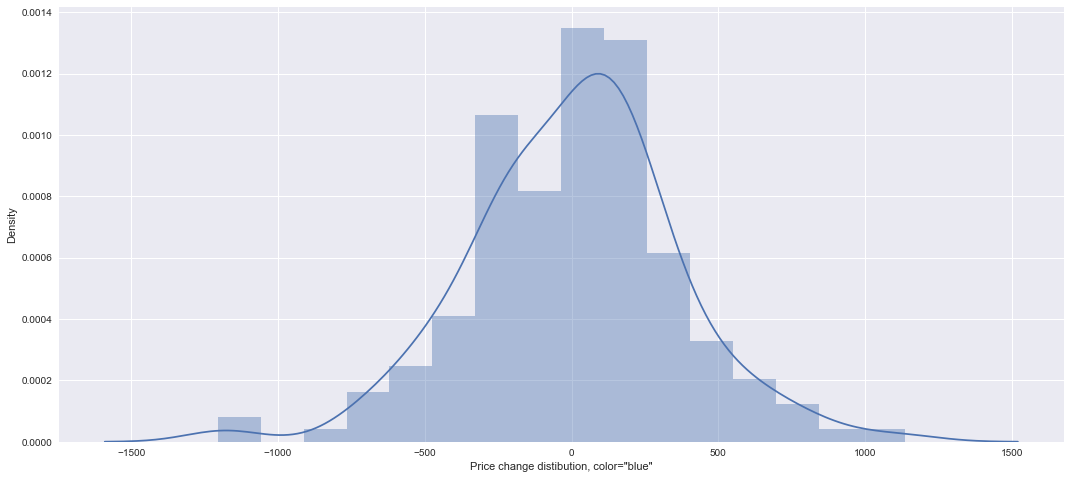

In [34]:
#Price change distribution
plt.figure(figsize=(18,8))
ax = sns.distplot(final_df['diff'], bins='auto', axlabel='Price change distibution, color="blue"')

### Wordcloud

In [35]:
def wordcloud(df):
    
    comment_words = ''
    stopwords = set(STOPWORDS)
    
        # iterate through the csv file
    for val in df:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1500, height = 1500, 
                      max_words=100, 
                      background_color ='white',
                      colormap='cool',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
    # plot the WordCloud image                      
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

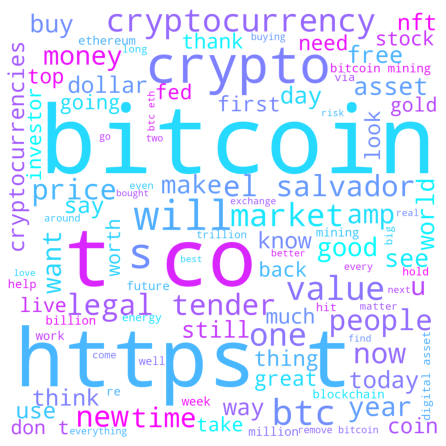

In [36]:
bow = df_tweet_sentiment['text'][df_tweet_sentiment['label']=='positive']
wordcloud(bow)

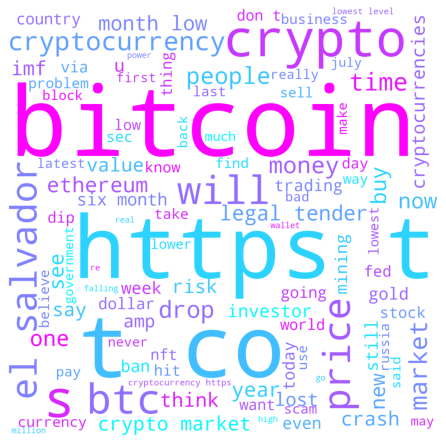

In [37]:
bow = df_tweet_sentiment['text'][df_tweet_sentiment['label']=='negative']
wordcloud(bow)

### Bigrams and n-grams analysis and their correlation with price change

#### Removing Stop Words

In [38]:
from nltk.corpus import stopwords
import string

# Get all the stop words in the English language
stopwords_list = stopwords.words('english')

# It is generally a good idea to also remove punctuation

# Now we have a list that includes all english stopwords, as well as all punctuation
stopwords_list += list(string.punctuation)
stopwords_list += ['“','”','‘','’', "'"]

In [39]:
from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
df_tweet_sentiment['tokenized_text'] = df_tweet_sentiment['text'].apply(tt.tokenize)

In [40]:
#Preview of text xolumn content after tokenizing
df_tweet_sentiment['tokenized_text'].iloc[0][:5]

['@FamiLee_Farm', '@0xBingBong', 'I', 'first', 'dissented']

In [41]:
#Create column with tokenized content after removing stopwords
df_tweet_sentiment['tokenized_text'] = df_tweet_sentiment['tokenized_text'].apply(lambda x: [w.lower() for w in x if w not in stopwords_list])

In [42]:
#Preview of text column content after removing stopwords
df_tweet_sentiment['tokenized_text'].iloc[0][:15]

['@familee_farm',
 '@0xbingbong',
 'i',
 'first',
 'dissented',
 '2018',
 'spot',
 'bitcoin',
 'etp',
 'denial',
 "it's",
 '4',
 'years',
 'later',
 'still']

In [43]:
#Create a list with all words (token) for requency distribution
all_tweet=[]

for idx in range(0, len(df_tweet_sentiment['tokenized_text'])):
    for i in df_tweet_sentiment['tokenized_text'].iloc[idx]:
        all_tweet.append(i)
        
len(all_tweet)

75263

#### Frequency Distributions

In [44]:
from  nltk import FreqDist
freqdist = FreqDist(all_tweet)

# get the 200 most common words 
most_common = freqdist.most_common(100)

In [45]:
#Most common
dict(most_common[:20])

{'bitcoin': 2809,
 '#bitcoin': 1515,
 'the': 665,
 'crypto': 664,
 'i': 636,
 '#crypto': 367,
 'market': 351,
 'price': 275,
 'like': 246,
 '#btc': 242,
 'new': 230,
 'value': 220,
 'el': 213,
 'salvador': 202,
 'one': 198,
 '#cryptocurrency': 196,
 'buy': 195,
 'cryptocurrency': 194,
 'people': 191,
 'btc': 190}

In [46]:
#Least common
last_20 = freqdist.most_common(100)
dict(last_20[:-20:-1])

{'3': 79,
 'november': 80,
 'need': 80,
 '2': 82,
 'low': 83,
 'country': 83,
 'go': 83,
 'lost': 84,
 'long': 85,
 'take': 87,
 'billion': 90,
 'currency': 90,
 'big': 90,
 'fed': 91,
 '…': 92,
 'says': 92,
 'way': 92,
 '—': 93,
 '2022': 93}

#### Correlation of frequently occurred words and bigrams with btc price different by hour

In [99]:
#Add bigrams to each row
df_tweet_sentiment['bigrams'] = df_tweet_sentiment['text'].apply(lambda row: list(nltk.ngrams(row.split(), 2)))
#Previe of df
df_tweet_sentiment

,created_at,text,label,tokenized_text,bigrams
0,2022-01-28 22:00,@FamiLee_Farm @0xBingBong I first dissented in...,negative,"[@familee_farm, @0xbingbong, i, first, dissent...","[(@FamiLee_Farm, @0xBingBong), (@0xBingBong, I..."
1,2022-01-28 22:00,A disaster.\n\nThe sooner aid agencies worldwi...,negative,"[a, disaster, the, sooner, aid, agencies, worl...","[(A, disaster.), (disaster., The), (The, soone..."
2,2022-01-28 22:00,With the very real threat of the government tr...,negative,"[with, real, threat, government, tracking, fin...","[(With, the), (the, very), (very, real), (real..."
3,2022-01-28 22:00,Bitcoin mining's energy use has more than trip...,neutral,"[bitcoin, mining's, energy, use, tripled, sinc...","[(Bitcoin, mining's), (mining's, energy), (ene..."
4,2022-01-28 22:00,Tori Zero NFT Project Launched a Joint Coopera...,positive,"[tori, zero, nft, project, launched, joint, co...","[(Tori, Zero), (Zero, NFT), (NFT, Project), (P..."
...,...,...,...,...,...
4761,2022-01-22 00:00,"El Salvador President Nayib Bukele, who’s know...",negative,"[el, salvador, president, nayib, bukele, known...","[(El, Salvador), (Salvador, President), (Presi..."
4762,2022-01-22 00:00,"And here's the news from today, by @nicola_m_w...",neutral,"[and, here's, news, today, @nicola_m_white, ht...","[(And, here's), (here's, the), (the, news), (n..."
4763,2022-01-22 00:00,Microstrategy falls 18% after SEC tells them t...,negative,"[microstrategy, falls, 18, sec, tells, can't, ...","[(Microstrategy, falls), (falls, 18%), (18%, a..."
4764,2022-01-22 00:00,"""Cryptocurrencies are no longer an isolated ri...",negative,"[cryptocurrencies, longer, isolated, risk, ass...","[(""Cryptocurrencies, are), (are, no), (no, lon..."


In [104]:
#Group all tweet word lists from specific hour togheter
df_word_hour = df_tweet_sentiment.groupby('created_at').sum()
df_word_hour.drop(columns=['text','label'], inplace=True)
df_word_hour.head()

,tokenized_text,bigrams
created_at,,
2022-01-22 00:00,"[pretty, sure, handbags, @emimelker, bought, p...","[(Pretty, sure), (sure, the), (the, handbags),..."
2022-01-22 01:00,"[crypto, hodl, republican, party, https://t.co...","[(Crypto, has), (has, a), (a, HODL), (HODL, on..."
2022-01-22 02:00,"[@solelawd_, @cryptocom, hi, could, please, se...","[(@SoleLawd_, @cryptocom), (@cryptocom, Hi), (..."
2022-01-22 03:00,"[@cryptobuzz_blog, this, bitcoin, that's, i, m...","[(@CryptoBuzz_Blog, This), (This, is), (is, wh..."
2022-01-22 04:00,"[el, salvador, purchased, another, 15, million...","[(El, Salvador), (Salvador, has), (has, purcha..."


In [105]:
df_dict_words = {}
df_dict_bigrams = {}

for idx in df_word_hour.index:
    #words
    text = df_word_hour['tokenized_text'].loc[idx]
    freqdist = FreqDist(text)
    most_common = freqdist.most_common(100)
    df_dict_words[idx] = dict(most_common)
    
    #bigrams
    bigrams = df_word_hour['bigrams'].loc[idx]
    freqdist = FreqDist(bigrams)
    most_common = freqdist.most_common(100)
    df_dict_bigrams[idx] = dict(most_common)

In [106]:
df_word_hour = pd.DataFrame.from_dict(df_dict_words).T
df_word_hour.fillna(0, inplace=True)
df_word_hour = df_word_hour.join(df_btc_usd_diff['diff'])
df_word_hour.head()

,bitcoin,i,#bitcoin,dip,market,year,buy,friday,if,today,...,cryptomining,https://t.co/fmrlc65c8o,tori,cooperation,bwl,trendy,jewelry,https://t.co/ij6iteb39n,senator,diff
2022-01-22 00:00,22.0,13.0,5.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.30
2022-01-22 01:00,13.0,4.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.58
2022-01-22 02:00,10.0,0.0,5.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.91
2022-01-22 03:00,7.0,6.0,5.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-151.78
2022-01-22 04:00,11.0,5.0,6.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-50.28


In [108]:
df_bigram_hour = pd.DataFrame.from_dict(df_dict_bigrams).T
df_bigram_hour.fillna(0, inplace=True)
df_bigram_hour = df_bigram_hour.join(df_btc_usd_diff['diff'])
df_bigram_hour.head()

,"(in, the)","(El, Salvador)","(Salvador, President)","(President, Nayib)","(Nayib, Bukele,)","(Bukele,, who’s)","(who’s, known)","(known, to)","(to, “buy)","(“buy, the)",...,"(consuming, as)","(much, energy)","(energy, as)","(as, entire)","(entire, countries.)","(countries., It's)","(It's, even)","(even, driving)","(driving, up)",diff
2022-01-22 00:00,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.30
2022-01-22 01:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.58
2022-01-22 02:00,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.91
2022-01-22 03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-151.78
2022-01-22 04:00,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-50.28


In [109]:
df_word_hour_corr = df_word_hour.corr()['diff'].to_frame()
df_bigram_hour_corr = df_bigram_hour.corr()['diff'].to_frame()

In [110]:
df_word_hour_corr[(df_word_hour_corr['diff']>0.25)&(df_word_hour_corr['diff']<1)]

,diff
find,0.282541
trying,0.324410
pasta,0.269251
all-time,0.259101
@bitcoin_phan,0.293646
@samouraiwallet,0.293646
@coldcardwallet,0.293646


In [114]:
df_bigram_hour_corr[(df_bigram_hour_corr['diff']>0.25)&(df_bigram_hour_corr['diff']<1)]

,diff
"(are, getting)",0.272169


### Grouping and Visualizing Time Series Data

Now, we'll look at how a time series can be regrouped for a given time interval, i.e. weekly/monthly/yearly average values and compare them to identify any changes taking place over time. We'll use the Pandas' grouper() function in conjunction with the .groupby() method to achieve this.



In [330]:
final_df.index = pd.to_datetime(final_df.index)

In [349]:
# Use pandas grouper to group values using annual frequency
day_diff = final_df['diff_high_low'].to_frame().groupby(pd.Grouper(freq ='D'))
day_neg = final_df['negative'].to_frame().groupby(pd.Grouper(freq ='D'))

In [359]:
# Create a new DataFrame and store yearly values in columns 
df_day_diff = pd.DataFrame()
df_day_neg = pd.DataFrame()

for day, group in day_diff:
    df_day_diff[day.day] = group.values.ravel()

ValueError: Length of values (23) does not match length of index (24)

In [360]:
for day, group in day_neg:
    df_day_neg[day.day] = group.values.ravel()

ValueError: Length of values (23) does not match length of index (24)

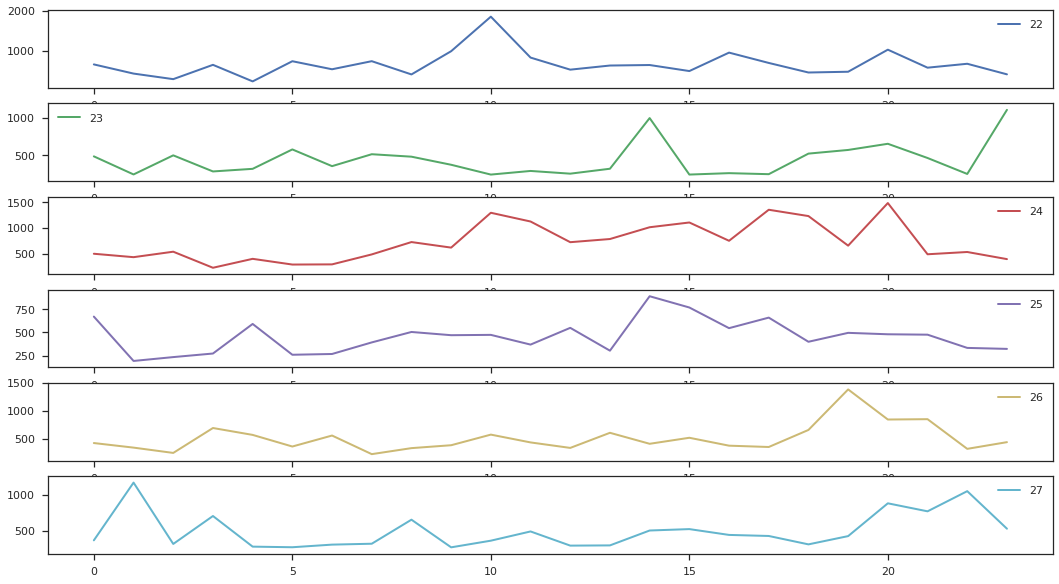

In [427]:
fig, ax = plt.subplots(figsize=(18, 10))

# Plot the yearly groups as subplots
df_day_diff.plot(subplots=True, legend=True, ax=ax)

plt.show()

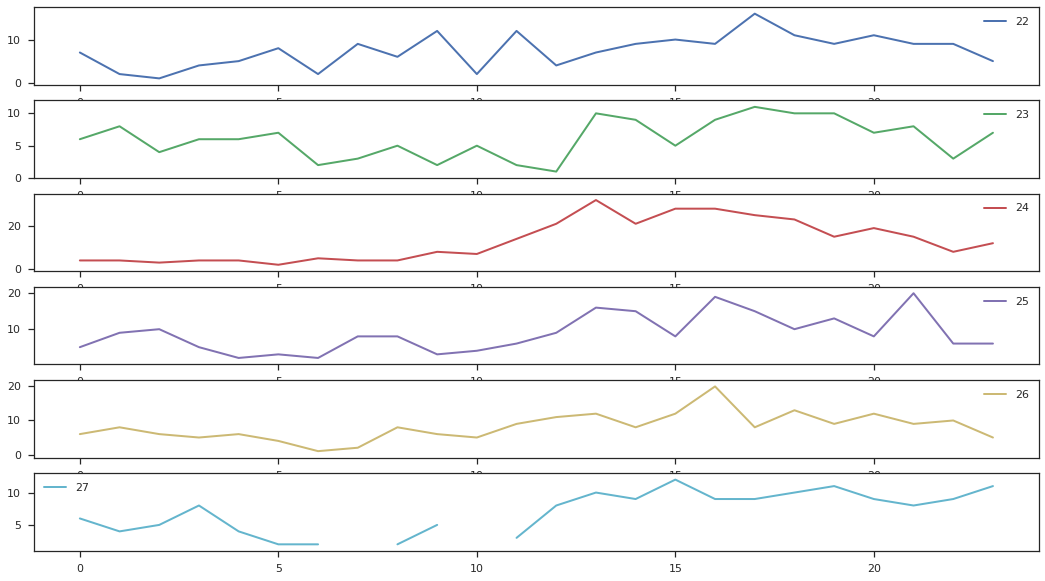

In [418]:
fig, ax = plt.subplots(figsize=(18, 10))
df_day_neg.plot(subplots=True, legend=True,ax=ax)
plt.show()